# TODO: Explore the data and generate some visualizations
### TODO: Do EDA
### TODO: Generate visualizations
### TODO: Check for Collinearity / Multicollinearity

In [ ]:
'''
from google.colab import drive

drive.mount('/content/gdrive')
'''


Mounted at /content/gdrive


In [ ]:
!ls

ACME-HappinessSurvey2020.csv  drive  sample_data


In [ ]:
#importing Data and Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# trying to retrieve the file from session storage
data_path = '/content/ACME-HappinessSurvey2020.csv'

#upload as dataframe
df = pd.read_csv(data_path)

#checking data is loaded in
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


### general looking at data structure

In [ ]:

print("data tail")
print(df.tail())

print("data shape")
print(df.shape)

print("data columns")
print(df.columns)

print("data types")
print(df.dtypes)

data tail
     Y  X1  X2  X3  X4  X5  X6
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5
data shape
(126, 7)
data columns
Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')
data types
Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object


### Summary Statistics


In [ ]:
--#entire dataset is numercal
print("printing summary statistics for each feature: ")
print(df.iloc[:, 1:7].describe())

#there are no null values in this dataset


printing summary statistics for each feature: 
               X1          X2          X3          X4          X5          X6
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000
mean     4.333333    2.531746    3.309524    3.746032    3.650794    4.253968
std      0.800000    1.114892    1.023440    0.875776    1.147641    0.809311
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      4.000000    2.000000    3.000000    3.000000    3.000000    4.000000
50%      5.000000    3.000000    3.000000    4.000000    4.000000    4.000000
75%      5.000000    3.000000    4.000000    4.000000    4.000000    5.000000
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000


### Looking at Data Distribution

number of 0's and 1's in target variable: 
1s: 69
0s: 57


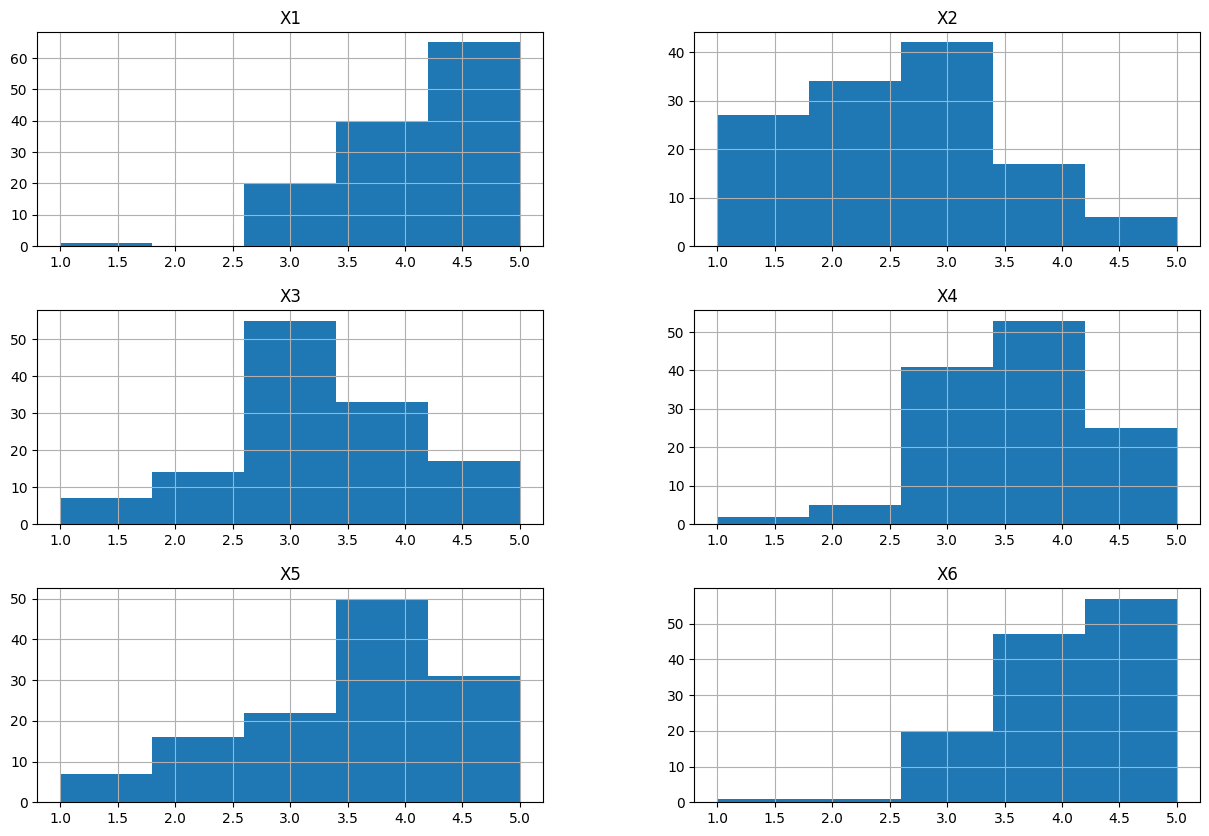

In [ ]:
#histogram for numerical
print("number of 0's and 1's in target variable: ")
y_col = df['Y']
num_one = y_col.value_counts().get(1,'NA')
num_zero = y_col.value_counts().get(0,"NA")
print(f"1s: {num_one}")
print(f"0s: {num_zero}")

df.iloc[:, 1:7].hist(bins = 5, figsize=(15,10))
plt.show()


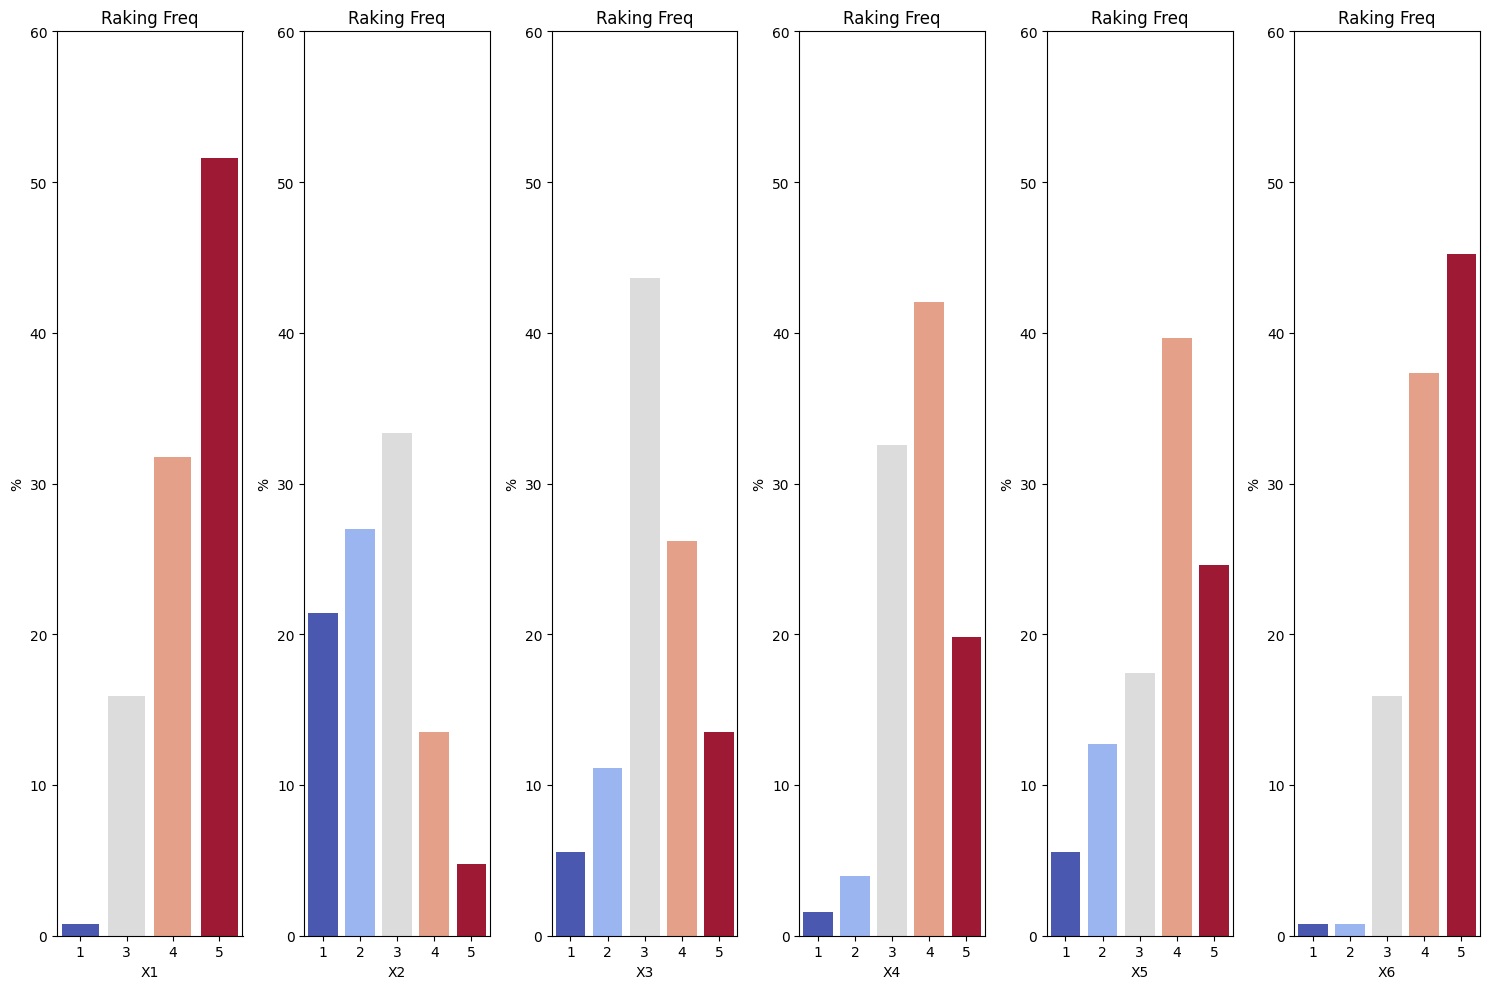

In [ ]:
#frequency histogram

#df of just feature columns
feat_df = df.iloc[:, 1:7].copy()

#percentage of each ranking type(1:5) for each feature
norm_counts = {}
for col in feat_df.columns:
  norm_counts[col] = feat_df[col].value_counts(normalize=True)*100

plt.figure(figsize=(15,10))

for i, col in enumerate(feat_df.columns):
  plt.subplot(1, len(feat_df.columns), i+1)
  sns.barplot(x=norm_counts[col].index, y=norm_counts[col].values, palette='coolwarm', hue=norm_counts[col].index, dodge=False)
  plt.title(f'Raking Freq')
  plt.xlabel(col)
  plt.ylabel('%')
  plt.ylim(0,60)
  plt.legend([], [], frameon=False) # Hide the legend

plt.tight_layout()
plt.show()


Notes from Histogram and Frequency Histogram:
- X1 and X6 have the almost the exact same histogram
 - except! X1 has more 5 ratings and X6 has more 4 ratings
 - same number of 3 ratings in both
 - **Investigate:** collinearity between X1 and
- X2 has the highest instances of low ratings

In [ ]:
#I want to create a seaborn.stripplot that plots every entry for all features but colors each dot according to df['Y'] value
# OR create another plot that shows which ratings have the greatest number of df['Y']=1 so we can track customer satisfaction

### Investigating Collinearity

In [ ]:
#Calculating the Correlation Coefficient using Pandas

#correlation for X1 and X6
X1_corr_X6 = df['X1'].corr(df['X6'])

print(f'Correlation between X1 and X6: {X1_corr_X6}')
#not what I was expecting...


Correlation between X1 and X6: 0.4118730327593505


          X1        X2        X3        X4        X5        X6
X1  1.000000  0.059797  0.283358  0.087541  0.432772  0.411873
X2  0.059797  1.000000  0.184129  0.114838  0.039996 -0.062205
X3  0.283358  0.184129  1.000000  0.302618  0.358397  0.203750
X4  0.087541  0.114838  0.302618  1.000000  0.293115  0.215888
X5  0.432772  0.039996  0.358397  0.293115  1.000000  0.320195
X6  0.411873 -0.062205  0.203750  0.215888  0.320195  1.000000


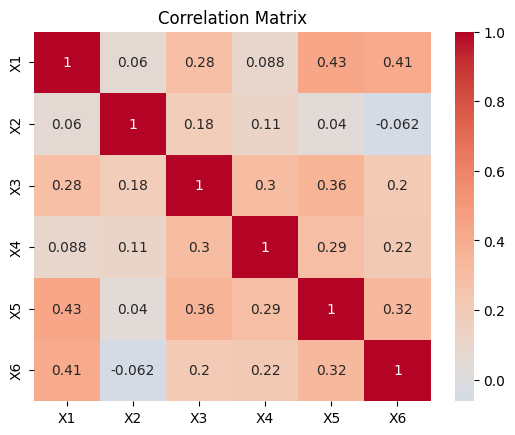

In [ ]:
#correlation matrix time

feat_corr_matrix = feat_df.corr()

print(feat_corr_matrix)

#visualizing
sns.heatmap(feat_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


Looks like the variables with the highest correlation coefficient are X1 with X5 (0.43), and X1 with X6 (0.41)
 - but I do not think the coeff is high enough to suggest collinearity between those features


Let's take a look at the Variance Inflation Factor (VIF) to consider multicollinearity

In [ ]:
#VIF can help identify multicollinearity among a set of features

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
  vif = pd.DataFrame()
  vif['Feature'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return vif

#calculate VIF for each feature
vif_df = calc_vif(feat_df)
print(vif_df)



  Feature        VIF
0      X1  35.247226
1      X2   6.184639
2      X3  14.664274
3      X4  19.882237
4      X5  15.813355
5      X6  31.895668
 
Evaluating df with Y in it
  Feature        VIF
0       Y   2.431069
1      X1  36.163104
2      X2   6.216740
3      X3  14.699112
4      X4  19.912374
5      X5  15.972872
6      X6  31.895674


This suggests that there is very severe multicollinearity with our X1 variable and with our X6 variable
This could indicate why the baseline regression models are not performing better than 61% accuracy


## Last bit of EDA

### First, plotting the Target Variable ['Y']

Reminder: 1 = Satisfied Customer and 0 = Unsatisfied Customer
 


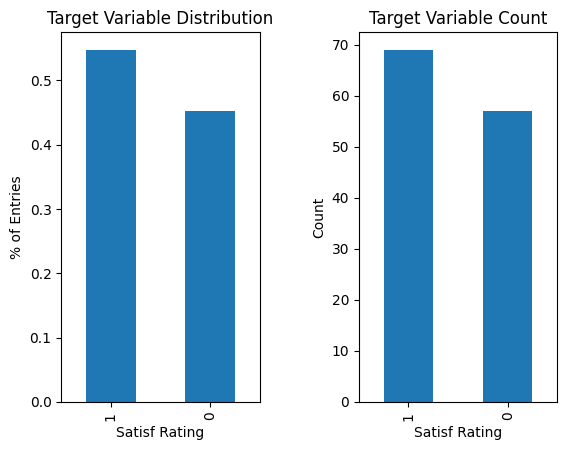

In [ ]:
print("Reminder: 1 = Satisfied Customer and 0 = Unsatisfied Customer")
print(" ")
# creating subplot 1
plt.subplot(1,2,1)   # 1 row & 2 cols
#creating actual plot to be plotted
df['Y'].value_counts(normalize=True).plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Satisf Rating')
plt.ylabel('% of Entries')

# creating subplot 2
plt.subplot(1,2,2) # 1 row & 2 cols
#creating actual plot
df['Y'].value_counts().plot(kind='bar')
plt.title('Target Variable Count')
plt.xlabel('Satisf Rating')
plt.ylabel('Count')

#adjusting plot spacing
plt.subplots_adjust(wspace=0.5)
plt.show()


Notes:

Initialilly it is noticed that the data seems to be relatively "equally" distributed  
However, something very important to keep in mind is that the kind of insight that will provide the greatest information to the Company will be insight on what leads to an UNHAPPY Customer rather than insight on what makes a Satisfied Customer.  
It is easier to initially want to prove what makes a satisfied customer, but we have to keep in mind the **Business Goals** and the main goal of this company's project is seeking to **increase customer satisfaction**.

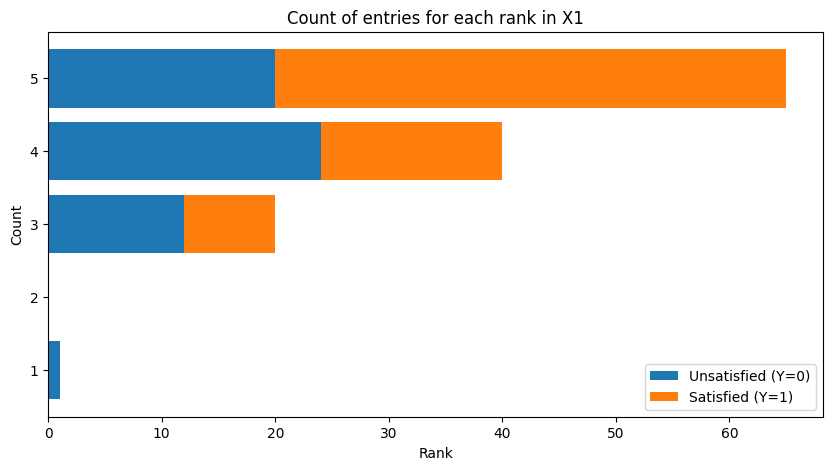

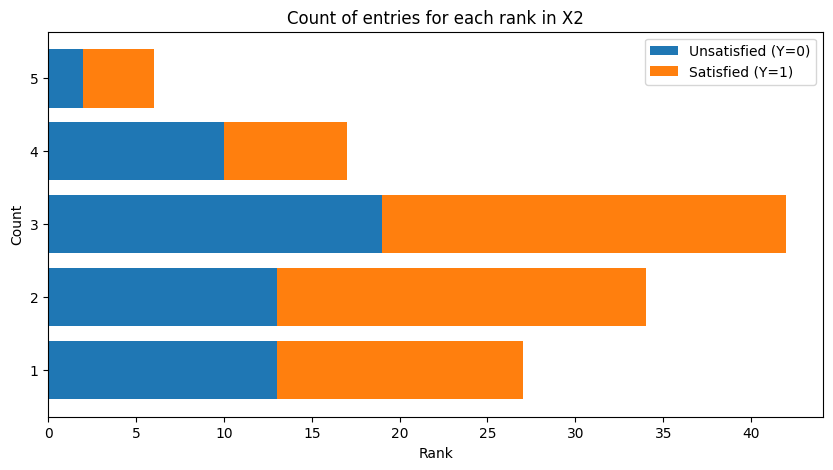

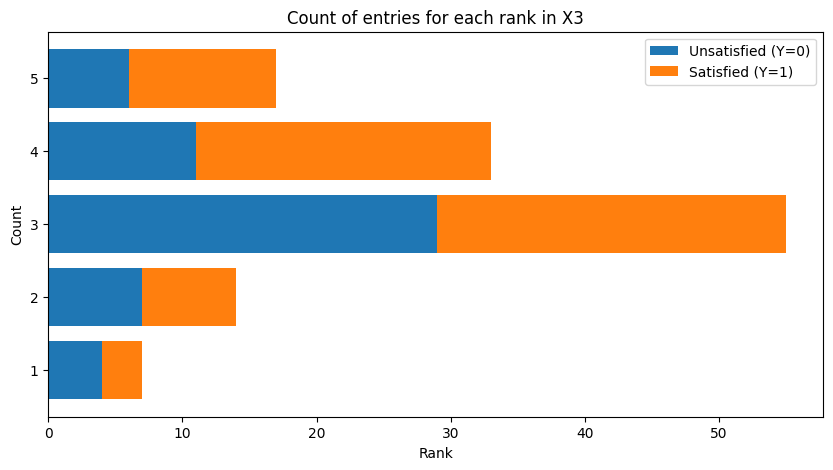

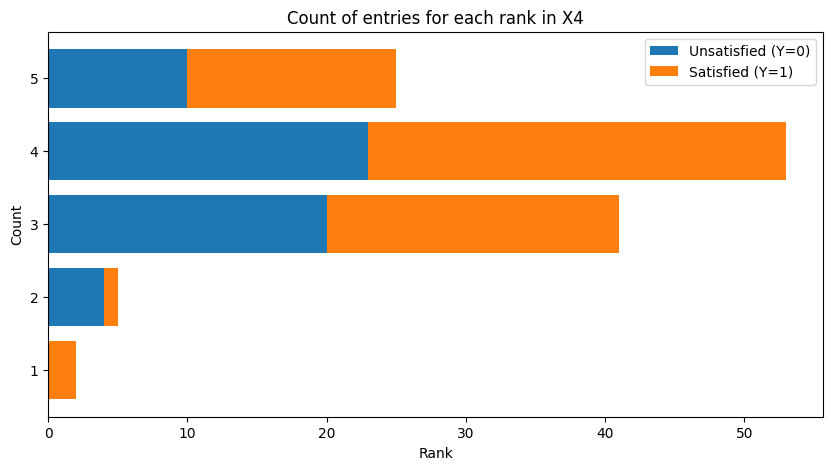

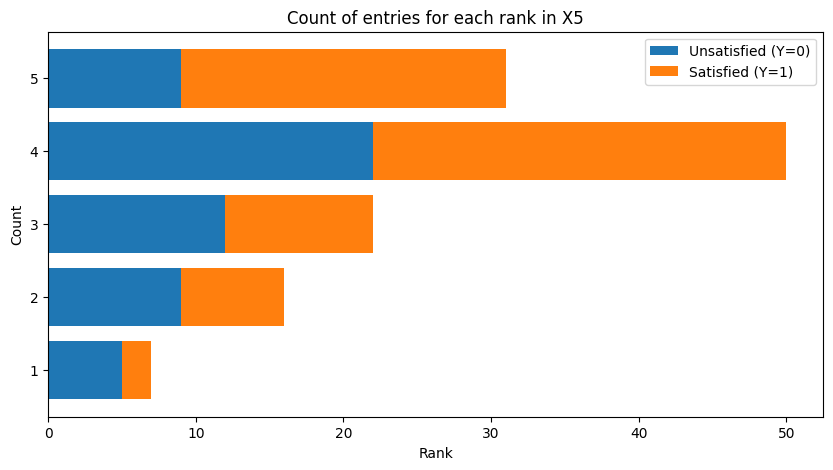

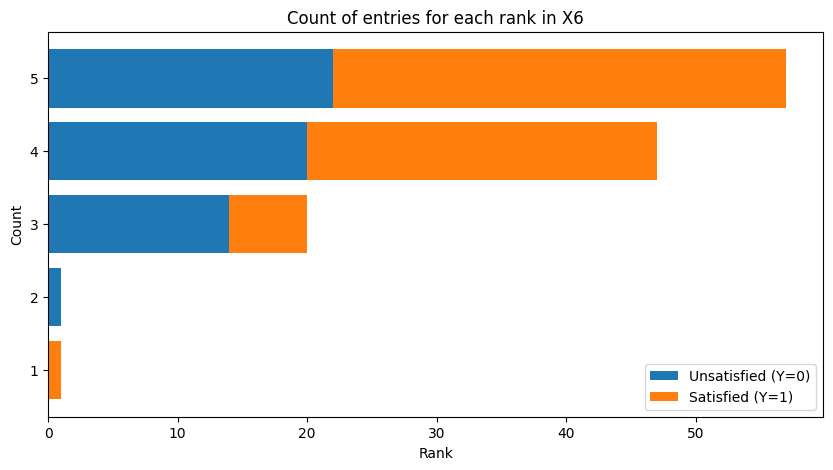

In [ ]:
# prompt: create a horizontal bar chart for each of the features in df where the x-axis is the rank number and the y-axis is the count of entries for each rank number. Format the horizontal bar chart where there are two row for each x-axis entry, one row is sum of entries where df['Y']=0 and the other row is he sum of entries where df['Y']=1.

def plot_ranked_counts(df, features):
  for col in features:
    # create data for bar chart
    df_rank_count = (df.groupby(col)['Y'].value_counts().unstack().fillna(0).astype(int))

    # create plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # set title and labels
    ax.set_title(f'Count of entries for each rank in {col}')
    ax.set_xlabel('Rank')
    ax.set_ylabel('Count')

    # plot bars for each satisfaction rating
    ax.barh(df_rank_count.index, df_rank_count[0], label='Unsatisfied (Y=0)')
    ax.barh(df_rank_count.index, df_rank_count[1], left=df_rank_count[0], label='Satisfied (Y=1)')

    # add legend and show plot
    ax.legend()
    plt.show()

# call the function with desired features
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
plot_ranked_counts(df, features)


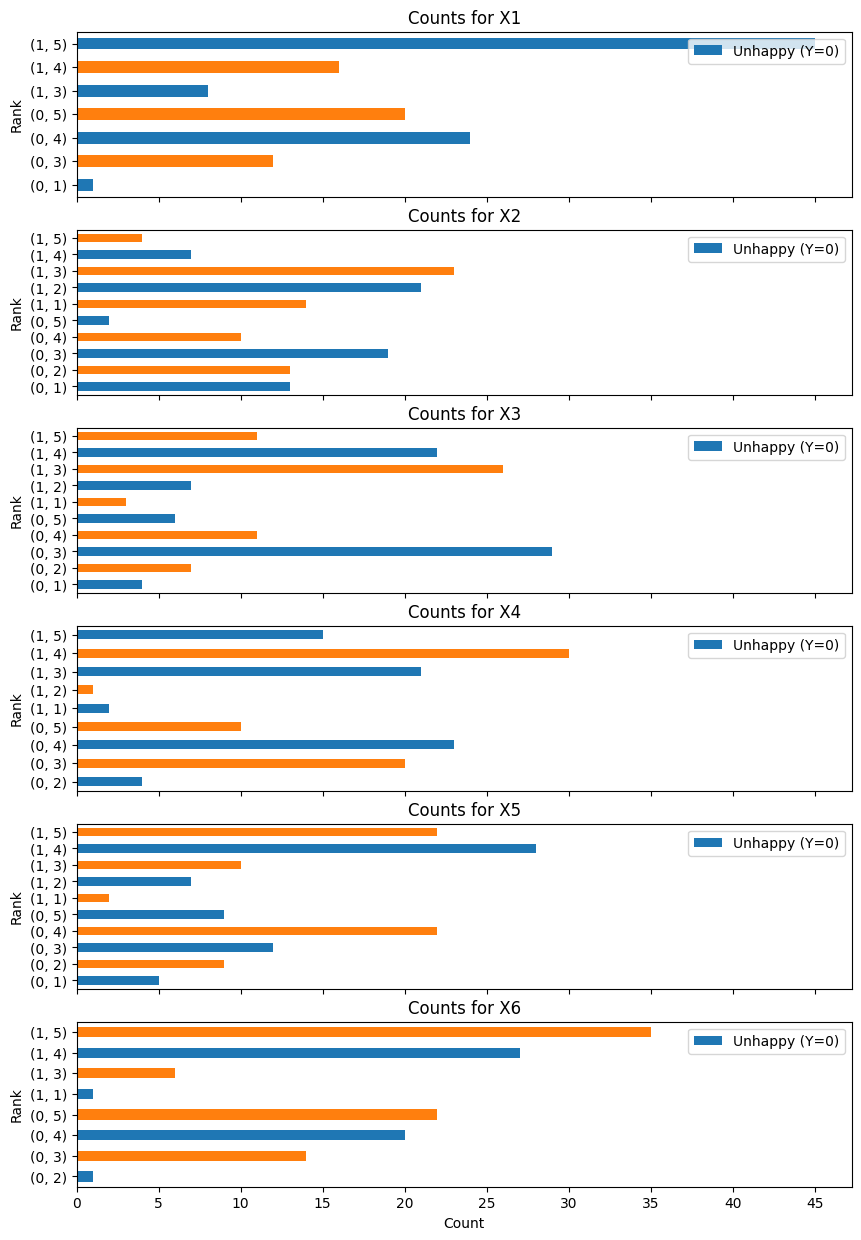

In [ ]:
#trying again to plot Y=0 and Y=1 separately for each feature of df

#function to calculate counts
def calc_counts(df, feature, target):
  counts = df.groupby([target, feature]).size()
  return counts


# calc counts for each feature
counts_dict = {col: calc_counts(df, col, 'Y') for col in df.columns if col != 'Y'}


# plot horizontal bar charts for each feature
fig, axes = plt.subplots(nrows=len(counts_dict), ncols=1, figsize=(10, 15), sharex=True)

for i, (col, counts) in enumerate(counts_dict.items()):
  ax = axes[i]
  counts.T.plot(kind = 'barh', stacked = False, ax=ax, color=['#1f77b4', '#ff7f0e'])
  ax.set_title(f'Counts for {col}')
  ax.set_ylabel("Rank")
  ax.set_xlabel("Count")
  ax.legend(['Unhappy (Y=0)', 'Happy (Y=1)'], loc='upper right')
  ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

#plt.tight_layout()
plt.show()